Problem statement: Where we have to predict whether a loan would be approved or not.
Hypothesis generation:
Below are some of the factors which I think can affect the Loan Approval(dependent variable for this loan prediction problem)
1. Salary: Applicants with high income should have more chances of loan approval
2. Previous history- Applicants who have repaid their past bedts have higher chances of loan approval
3. Loan amount-if loan amount is less then chances of approval is high
4. loan term- if the term is for less time period then chances of approval is high
5. EMI-if EMI is less then high chance of approval

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df=pd.read_csv(r"C:\Savithri\BI\IBMDataScience\IBM Data Science\AnalyticsVidhya\train.csv")

In [7]:
test=pd.read_csv(r"C:\Savithri\BI\IBMDataScience\IBM Data Science\AnalyticsVidhya\Loanprediction\test.csv")

### Understanding Data

In [3]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.shape#12 independent and 1 dependent variable and training set has 614 rows

(614, 13)

In [9]:
test.shape

(367, 12)

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Inferences by looking at the output of describe() function

1. Loanamount has 22 missing values 614-592
2. Load_Amount_Team has 14 missing values, 614-600
3. Credit history has 50 missing values 614-564
5. Also about 84% applicants have a credit_hisotry, How? THe mean of Creadit_History is 0.84(The Credit_History has value 1 for those who have a credit history and 0 otherwise)


### Univariate Analysis

In [11]:
#The target variable is catagorical variable so take frequency table
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
#To get percentage values set Normalize is true
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

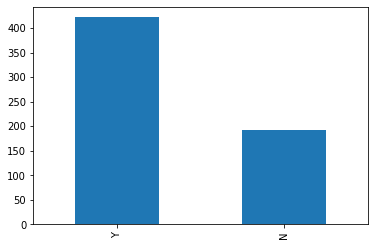

In [13]:
df['Loan_Status'].value_counts().plot.bar()

In [16]:
plt.figure(1)
plt.subplot(221)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
df['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
df['Credit_History'].value_counts(normalize=True).plot.bar(itle='Credit_History')
plt.show()

TypeError: 'module' object is not callable

In [12]:
#frequency distribution of catagorical variable
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

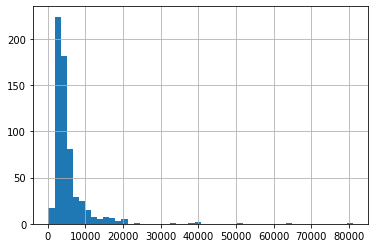

In [13]:
#Distribution analysis of numerical variable
df['ApplicantIncome'].hist(bins=50)

With the above histogram, we can see that there are few extreme values

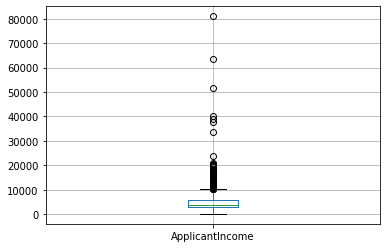

In [14]:
#Distribution analysis with box plot
df.boxplot(column='ApplicantIncome')

With the above box plot, we can see presence of lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different level of education. Let us segregate them by education

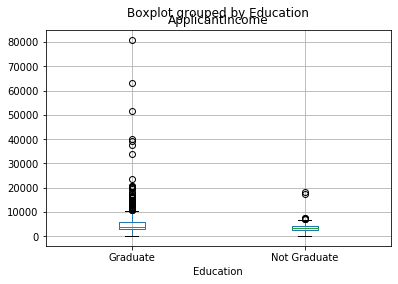

In [15]:
df.boxplot(column='ApplicantIncome',by='Education')

With the above box plot, we can see that there are more number of graduates with high incomes, which are appearing to be the outliers.

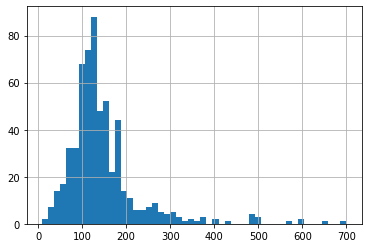

In [16]:
df['LoanAmount'].hist(bins=50)

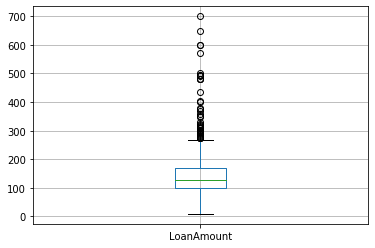

In [17]:
df.boxplot(column='LoanAmount')

So, Clearly both ApplicantIncome and LoanAmount require some amount of data munging. LoanAmount has missing and also extreme values, while AppplicantIncome has a few extreme values, which demand deeper understanding

In [6]:
#Catagorical Variable Analysis
t1=df['Credit_History'].value_counts(ascending=True)
t2=df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(t1)
print('\nProbability of getting loan for each Credit History class:')
print(t2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


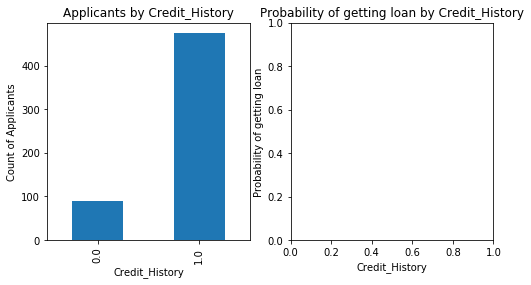

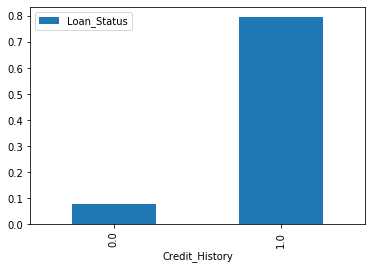

In [7]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,4)) 
ax1=fig.add_subplot(121)
ax1.set_xlabel('Credit_History') 
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
t1.plot(kind='bar')
ax2=fig.add_subplot(122) 
ax2.set_xlabel('Credit_History') 
ax2.set_ylabel('Probability of getting loan') 
ax2.set_title("Probability of getting loan by Credit_History")
t2.plot(kind='bar')

So probability of getting loan is 8 times high, if the applicant has a valid credit history.

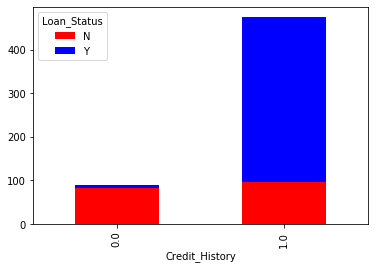

In [8]:
t3=pd.crosstab(df['Credit_History'],df['Loan_Status'])
t3.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

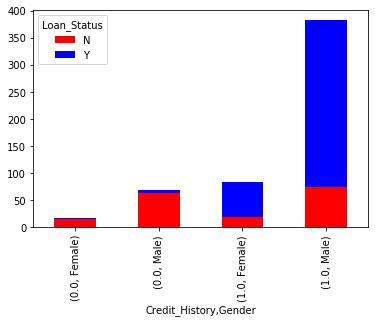

In [9]:
t4=pd.crosstab([df.Credit_History,df.Gender],df.Loan_Status)
t4.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

Missing Values

In [11]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [ ]:
df.boxplot(column='ApplicantIncome',by='Education')